# Project 2 - Menganalisis Risiko Gagal Bayar Peminjam

Tugas Anda adalah menyiapkan laporan untuk divisi kredit suatu bank. Anda akan mencari tahu pengaruh status perkawinan seorang nasabah dan jumlah anak yang dimilikinya terhadap probabilitas gagal bayar dalam pelunasan pinjaman. Pihak bank sudah memiliki beberapa data mengenai kelayakan kredit nasabah.

Laporan Anda akan dipertimbangkan pada saat membuat **penilaian kredit** untuk calon nasabah. **Penilaian kredit** digunakan untuk mengevaluasi kemampuan calon peminjam untuk melunasi pinjaman mereka.

[Dalam *notebook* ini, Anda dapat menemukan petunjuk dan instruksi singkat serta arahan untuk berfikir. Jangan abaikan petunjuk tersebut karena mereka dirancang untuk membekali Anda dengan struktur pengerjaan proyek dan akan membantu Anda menganalisis apa yang sedang Anda lakukan secara mendalam. Sebaliknya, buatlah agar laporan ini terlihat seolah-olah dikirimkan oleh Anda kepada rekan satu tim Anda untuk menunjukkan temuan Anda - mereka tidak perlu tahu bahwa Anda mendapatkan bantuan eksternal dari kami! Untuk membantu Anda, kami menempatkan semua petunjuk yang harus Anda hapus dalam tanda kurung siku.]

[Sebelum Anda masuk ke dalam analisis data Anda, jelaskan tujuan proyek dan hipotesis yang akan Anda uji.]

## Buka *file* data dan baca informasi umumnya.

[Mulailah dengan mengimpor *library* dan memuat datanya. Anda mungkin akan menyadari bahwa Anda memerlukan *library* tambahan saat Anda telah mengerjakan proyek ini, dan itu merupakan hal yang normal. Hanya saja, pastikan untuk memperbarui bagian ini jika dibutuhkan.]

In [1]:
import pandas as pd

import numpy as np

In [2]:
try:
    df = pd.read_csv('credit_scoring_eng.csv')
except:
    df = pd.read_csv('/datasets/credit_scoring_eng.csv')

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## Soal 1. Eksplorasi data

**Deskripsi Data**
- `children` - jumlah anak dalam keluarga
- `days_employed` - pengalaman kerja nasabah dalam hari
- `dob_years` - usia nasabah dalam tahun
- `education` - tingkat pendidikan nasabah
- `education_id` - pengidentifikasi untuk tingkat pendidikan nasabah
- `family_status` - pengidentifikasi untuk status perkawinan nasabah
- `family_status_id` - tanda pengenal status perkawinan
- `gender` - jenis kelamin nasabah
- `income_type` - jenis pekerjaan
- `debt` - apakah nasabah memiliki hutang pembayaran pinjaman
- `total_income` - pendapatan bulanan
- `purpose` - tujuan mendapatkan pinjaman

[Sekarang saatnya mengeksplor data kita. Anda perlu melihat berapa banyak kolom dan baris yang dimiliki oleh data, serta mencermati beberapa baris data untuk memeriksa potensi masalah dengan data.]

In [3]:
df.shape

(21525, 12)

In [4]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


[Jelaskan apa yang Anda lihat dan perhatikan dalam sampel data yang Anda tampilkan. Apakah terdapat masalah yang mungkin memerlukan penyelidikan dan perubahan lebih lanjut?]

__Sampel data pada _'days_employed'_ memiliki nilai minus/negatif.__

__Pada kolom days_employed juga nilainya float, padahal satuan ukur untuk hari bekerja itu tanpa desimal.__

__Penulisan pada value yang tertera dikolom 'education' masih berbeda-beda dan harus disamakan.__

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [6]:
df.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,19351.000000
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,26787.568355
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,16475.450632
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,3306.762000
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,16488.504500
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,23202.870000
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,32549.611000
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,362496.645000


[Apakah terdapat nilai yang hilang di semua kolom atau hanya di beberapa kolom? Jelaskan secara singkat apa yang Anda amati dalam 1-2 kalimat.]

__Pada dataset tertera bahwa kita memiliki 21525 baris tetapi baris kolom _'days employed'_ dan _'total_income_ hanya memiliki 19351 baris, itu artinya kedua kolom itu memiliki nilai yang hilang (missing values).__

__Nilai yang terdapat pada kolom *children* dan *days_employed* memiliki nilai minus/negatif, hal tersebut tidak masuk akal.__

In [7]:
df.loc[df['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


[Apakah nilai yang hilang tampak simetris? Apakah kita yakin dengan asumsi ini? Jelaskan pendapat Anda secara singkat di bagian ini. Anda mungkin ingin melakukan penyelidikan lebih lanjut, dan menghitung nilai yang hilang di semua baris dengan nilai yang hilang untuk memastikan bahwa sampel yang hilang memiliki ukuran yang sama.]

__Berdasarkan pengamatan saya, nilai yang hilang tampak simetris karena kolom *days_employed* dan *total_income* memiliki missing values yang sama pada baris yang sama, hal ini bisa saja disebabkan oleh kesalahan sistem karena menurut asumsi saya tidak mungkin kolom _days_employed_ dan juga _total_income_ bukan menjadi hal yang wajib (mandatory) untuk diisi oleh calon peminjam, 2 variabel tersebut bisa menjadi faktor penting dalam memberikan pinjaman dana, tapi bisa saja calon nasabah menolak untuk mencantumkan informasi tersebut pada saat pengajuan dengan alasan tertentu.__

In [8]:
df_null = df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())]

In [9]:
df_null.shape

(2174, 12)

**Kesimpulan sementara**

[Apakah jumlah baris dalam tabel yang telah difilter sesuai dengan jumlah nilai yang hilang? Kesimpulan apa yang bisa kita buat dari hal ini?]

__Sejauh ini jumlah baris dalam tabel yang telah difilter sesuai dengan nilai yang hilang yaitu 2174 baris. Saya bisa menyimpulkan bahwa nilai yang hilang simetris dengan jumlah baris dalam tabel.__

[Hitung persentase nilai yang hilang jika dibandingkan dengan keseluruhan *dataset*. Apakah nilai yang hilang merupakan bagian data yang cukup besar? Jika demikian, Anda sebaiknya perlu mengisi nilai yang hilang. Untuk melakukannya, pertama-tama kita harus mempertimbangkan apakah data yang hilang bisa jadi disebabkan oleh karakteristik nasabah tertentu, seperti jenis pekerjaan atau yang lainnya. Anda harus memutuskan karakteristik mana yang menurut *Anda* mungkin merupakan penyebabnya. Kedua, kita harus memeriksa apakah ada ketergantungan nilai yang hilang pada nilai indikator lain dengan kolom-kolom yang mengidentifikasikan karakteristik tertentu nasabah.]

In [10]:
rows_in_df_null = df_null.shape[0]
rows_in_df = df.shape[0]

round(rows_in_df_null / rows_in_df * 100,)

10


[Jelaskan langkah Anda selanjutnya dan bagaimana hubungannya dengan kesimpulan yang Anda buat sejauh ini.]

__Saya akan melihat persentase nilai yang hilang dari kolom *days_employed* dan *total_income* apakah jumlahnya signifikan.__

__Saya mencoba fungsi unique() pada missing values dikolom *days_employed* dan *total_income* berdasarkan *income_type* dan juga *education* apakah memiliki kesamaan nilai unik karena menurut saya dua hal tersebut bisa menjawab alasan adanya missing values, kemungkinannya bisa saja karena calon nasabah adalah retiree ataupun unemployed (dengan alasan belum mendapatkan pekerjaan atau memang masih bersekolah) ataupun kemungkinan yang lain.__

__Saya akan menghitung jumlah missing values pada kolom *days_employed* dan *total_income* berdasarkan *income_type* dan juga *education* untuk melihat susunan jumlahnya apakah ada kesamaan.__

In [11]:
other_columns = ['children', 'dob_years', 'education', 'education_id', 'family_status', 'family_status_id', 'gender', 'income_type', 'debt', 'purpose']
data_na = df.loc[(df['days_employed'].isna()) & (df['total_income'].isna())]

In [12]:
print(df.loc[(df['days_employed'].isna()), 'income_type' ].unique())

print()
print(df.loc[(df['total_income'].isna()), 'income_type' ].unique())

['retiree' 'civil servant' 'business' 'employee' 'entrepreneur']

['retiree' 'civil servant' 'business' 'employee' 'entrepreneur']


In [13]:
print('Count of missing days employed by income type')
print(df[df['days_employed'].isna()]['income_type'].value_counts())

print()
print('Count of total income missing by income type')
print(df[df['total_income'].isna()]['income_type'].value_counts())

Count of missing days employed by income type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64

Count of total income missing by income type
employee         1105
business          508
retiree           413
civil servant     147
entrepreneur        1
Name: income_type, dtype: int64


In [14]:
print(df.loc[(df['days_employed'].isna()), 'education' ].unique())

print()
print(df.loc[(df['total_income'].isna()), 'education' ].unique())

['secondary education' "bachelor's degree" 'SECONDARY EDUCATION'
 'some college' 'Secondary Education' 'Some College' "Bachelor's Degree"
 'SOME COLLEGE' 'primary education' "BACHELOR'S DEGREE"
 'Primary Education' 'PRIMARY EDUCATION']

['secondary education' "bachelor's degree" 'SECONDARY EDUCATION'
 'some college' 'Secondary Education' 'Some College' "Bachelor's Degree"
 'SOME COLLEGE' 'primary education' "BACHELOR'S DEGREE"
 'Primary Education' 'PRIMARY EDUCATION']


In [15]:
print('Count of missing days employed by education')
print(df[df['days_employed'].isna()]['education'].value_counts())

print()
print('Count of total income missing by education')
print(df[df['total_income'].isna()]['education'].value_counts())

Count of missing days employed by education
secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
SOME COLLEGE              7
Some College              7
Primary Education         1
PRIMARY EDUCATION         1
Name: education, dtype: int64

Count of total income missing by education
secondary education    1408
bachelor's degree       496
SECONDARY EDUCATION      67
Secondary Education      65
some college             55
Bachelor's Degree        25
BACHELOR'S DEGREE        23
primary education        19
SOME COLLEGE              7
Some College              7
Primary Education         1
PRIMARY EDUCATION         1
Name: education, dtype: int64


[Deksripsikan temuan Anda di sini.]

__Ditemukan jumlah persentase dari missing values dikolom *days_employed* dan *total_income* sama-sama sejumlah 10 %.__

__Kemudian, setelah menggunakan fungsi unique() pada missing values dikolom *days_employed* dan *total_income* berdasarkan *income_type* dan juga *education* ditemukan susunan unique values yang sama.__

__Setelah menghitung jumlah missing values dari kolom *days_employed* dan *total_income* berdasarkan *income_type*  dan juga *education*, saya juga melihat jumlah yang sama.__

__Hal ini menjawab sedikit kebenaran asumsi saya bahwa missing values terjadi karena calon nasabah adalah retiree, tetapi juga membantah asumsi saya yang menyatakan bahwa missing values terjadi karena calon nasabah adalah unemployed. Tentunya hasil yang didapatkan menarik perhatian saya karena missing values dikolom *days_employed* dan *total_income* terdapat pada calon nasabah yang memiliki pekerjaan dan penghasilan.__

[Kemukakan gagasan Anda mengenai kemungkinan alasan hilangnya nilai-nilai tersebut. Apakah menurut Anda mereka hilang secara acak atau apakah terdapat pola-pola tertentu?]

__Setelah melihat nilai unik yang tertera diatas, hilangnya nilai-nilai tersebut tidak mengindikasikan karena adanya calon nasabah yang unemployed ataupun pelajar, karena nilai uniknya tidak menunjukkan demikian, kemungkinan missing values ada karena calon nasabah tidak mencantumkannya pada saat pengajuan pinjaman.__

__Sejauh ini, menurut asumsi saya data tersebut tidak hilang secara acak.__

__Saya akan melihat distribusi data dari kolom yang bersifat *'categorical'* yang tertera dari dataset, untuk melihat kemungkinan jenis masalah: duplikat, pencatatan yang berbeda, sumber data yang salah, dan nilai yang hilang.__

In [16]:
print('distribusi jumlah anak pada kelompok calon nasabah dengan nilai yang hilang :')
      
df['children'].value_counts(normalize = True)

distribusi jumlah anak pada kelompok calon nasabah dengan nilai yang hilang :


 0     0.657329
 1     0.223833
 2     0.095470
 3     0.015331
 20    0.003531
-1     0.002184
 4     0.001905
 5     0.000418
Name: children, dtype: float64

__Kolom *children* didominasi dengan calon nasabah yang tidak memiliki anak atau 0 sejumlah 65%. Sejauh ini saya cukup merasa janggal dengan angka 0 dan terlebih lagi angka 20 sebagai jumlah anak, apakah ini normal atau tidak ? untuk menjawab hal tersebut nantinya saya melakukan riset lebih lanjut tentang berapa jumlah yang masih memungkinkan untuk seorang wanita melahirkan, agar menyamakan persepsi saya dengan data ini.__

In [17]:
print('distribusi dob_years atau usia pada kelompok calon nasabah dengan nilai yang hilang:')

df['dob_years'].value_counts(normalize=True)

distribusi dob_years atau usia pada kelompok calon nasabah dengan nilai yang hilang:


35    0.028664
40    0.028293
41    0.028200
34    0.028014
38    0.027782
42    0.027735
33    0.026992
39    0.026620
31    0.026016
36    0.025784
44    0.025412
29    0.025319
30    0.025087
48    0.024994
37    0.024948
50    0.023879
43    0.023833
32    0.023693
49    0.023600
28    0.023368
45    0.023089
27    0.022904
56    0.022625
52    0.022485
47    0.022300
54    0.022253
46    0.022067
58    0.021417
57    0.021370
53    0.021324
51    0.020813
59    0.020627
55    0.020581
26    0.018955
60    0.017515
25    0.016585
61    0.016492
62    0.016353
63    0.012497
64    0.012311
24    0.012265
23    0.011800
65    0.009013
66    0.008502
22    0.008502
67    0.007758
21    0.005157
0     0.004692
68    0.004599
69    0.003949
70    0.003020
71    0.002695
20    0.002369
72    0.001533
19    0.000650
73    0.000372
74    0.000279
75    0.000046
Name: dob_years, dtype: float64

__Distribusi pada kolom dob_years pada kelompok calon nasabah yang mengalami nilai yang hilang memperlihatkan usia calon nasabah tersebar, masing-masing usia tidak ada yang lebih dari 4%. karena itu untuk selanjutnya perlu dibuat kelompok usia untuk mempermudah analisa. Jika dilihat sekilas, 10 usia teratas sepertinya sebagian besar tersebar pada usia seikitar 30 - 40an.__

In [18]:
print('distribusi latar belakang pendidikan pada kelompok calon nasabah dengan nilai yang hilang:')

df['education'].value_counts(normalize = True)

distribusi latar belakang pendidikan pada kelompok calon nasabah dengan nilai yang hilang:


secondary education    0.638792
bachelor's degree      0.219187
SECONDARY EDUCATION    0.035865
Secondary Education    0.033031
some college           0.031034
BACHELOR'S DEGREE      0.012729
Bachelor's Degree      0.012451
primary education      0.011614
Some College           0.002184
SOME COLLEGE           0.001347
PRIMARY EDUCATION      0.000790
Primary Education      0.000697
graduate degree        0.000186
GRADUATE DEGREE        0.000046
Graduate Degree        0.000046
Name: education, dtype: float64

__Kolom education didominasi dengan calon nasabah yang berlatar belakang pendidikan secondary education sejumlah 70%, hanya saja ada beberapa pengejaan/penulisan dari secondary education dan juga latar belakang pendidikan lain yang berbeda-beda, nantinya saya akan mencoba menyamakan pengejaannya.__

In [19]:
print('distribusi education_id pada kelompok calon nasabah dengan nilai yang hilang:')

df['education_id'].value_counts(normalize = True)

distribusi education_id pada kelompok calon nasabah dengan nilai yang hilang:


1    0.707689
0    0.244367
2    0.034564
3    0.013101
4    0.000279
Name: education_id, dtype: float64

__Kolom education_id didominasi dengan calon nasabah dengan nilai ID 1 sejumlah 70%, setelah membaca polanya, saya mengambil kesimpulan bahwa education_id ini adalah kode yang menyimbolkan status pendidikan dari calon nasabah itu sendiri.__

__Kurang lebih penjelasannya sebagai berikut :__

__Kode 0 = Bachelor's Degree (Sarjana/S1)__

__Kode 1 = Secondary Education (Pendidikan Menengah Tingkat Pertama/SMP)__

__Kode 2 = Some College (Diploma/D3)__

__Kode 3 = Primary Education (Pendidikan Dasar/SD)__

__Kode 4 = Graduate Degree (Pascasarjana/S2)__

In [20]:
print('distribusi status keluarga pada kelompok calon nasabah dengan nilai yang hilang:')

df['family_status'].value_counts(normalize = True)

distribusi status keluarga pada kelompok calon nasabah dengan nilai yang hilang:


married              0.575145
civil partnership    0.194053
unmarried            0.130685
divorced             0.055517
widow / widower      0.044599
Name: family_status, dtype: float64

__Kolom family_status didominasi dengan calon nasabah dengan status sudah menikah (married) sejumlah 57%, sejauh ini ada beberapa asumsi setelah melihat distribusi dari kolom ini, beberapanya adalah perbedaan status married dengan civil partnership, kemudian perbedaan status divorced dengan widow/widowers, tapi sejauh ini saya akan membiarkan datanya seperti ini sampai saya melakukan riset lebih lanjut terkait perbedaan-perbedaan yang sudah saya sebutkan apakah perlu disamakan saja atau tidak.__

In [21]:
print('distribusi family_status_id pada kelompok nasabah dengan nilai yang hilang:')

df['family_status_id'].value_counts(normalize = True)

distribusi family_status_id pada kelompok nasabah dengan nilai yang hilang:


0    0.575145
1    0.194053
4    0.130685
3    0.055517
2    0.044599
Name: family_status_id, dtype: float64

__Kolom family_status_id didominasi dengan nilai 0 sejumlah 57 %, saya mencoba melihat pola dan mengartikan maksud dari family_status_id yang tertera, dan setelah saya pelajari lebih lanjut, family_status_id semacam kode yang menyimbolkan status dari kolom family_status itu sendiri.__

__Setelah melakukan riset lebih lanjut, saya menemukan perbedaan dari setiap status, untuk itu kodenya pun dibedakan.__

__Kurang lebih penjelasan singkatnya seperti ini :__

__Kode 0 = Married (Menikah)__

__Kode 1 = Civil Partnership (Persatuan Sipil, secara harafiah bisa diartikan sebagai hubungan yang sah dan terdaftar secara
           hukum dengan orang yang tidak ada hubungannya dengan kita dalam ikatan pernikahan ataupun keluarga, dalam konteks ini bisa berjenis
           kelamin pria maupun wanita, mendaftarkan hubungan ini secara legal akan memberikan orang yang bersangkutan sebuah
           hak yang sah untuk bertanggung jawab penuh terhadap partnernya meskipun tidak berstatus suami istri ataupun bukan
           saudara dan keluarga).__

__Kode 2 = Widow/Widower (Janda/Duda, dalam konteks ini status mereka bukan disebabkan oleh perceraian yang disengaja atau diniatkan oleh kedua pihak, tetapi karena lain hal seperti salah satu pihak mengalami kematian, dll).__

__Kode 3 = Divorced (Bercerai, dalam konteks ini status perceraian terjadi atas persetujuan kedua belah pihak/diniatkan).__


__Kode 4 = Unmarried (Belum menikah / lajang).__

In [22]:
print('distribusi jenis kelamin pada kelompok calon nasabah dengan nilai yang hilang:')

df['gender'].value_counts(normalize = True)

distribusi jenis kelamin pada kelompok calon nasabah dengan nilai yang hilang:


F      0.661370
M      0.338583
XNA    0.000046
Name: gender, dtype: float64

__Kolom gender didominasi dengan jenis kelamin wanita (F) dengan persentase 66%, selain itu terdapat jenis kelamin yang tidak teridentifikasi yaitu XNA.__

In [23]:
print('distribusi jenis penghasilan pada kelompok calon nasabah dengan nilai yang hilang:')

df['income_type'].value_counts(normalize = True)

distribusi jenis penghasilan pada kelompok calon nasabah dengan nilai yang hilang:


employee                       0.516562
business                       0.236237
retiree                        0.179141
civil servant                  0.067782
unemployed                     0.000093
entrepreneur                   0.000093
student                        0.000046
paternity / maternity leave    0.000046
Name: income_type, dtype: float64

__Kolom income_type didominasi status employee (karyawan) dengan persentase sejumlah 51%, sejauh ini saya juga memiliki asumsi pribadi terhadap beberapa value dari kolom ini, seperti perbedaan employee dengan civil servant, perbedaan business dan entrepreneur, apakah student harus disamakan dengan unemployed. Untuk menjawab itu saya akan melakukan riset lebih lanjut kembali.__

In [24]:
print('distribusi utang pada kelompok calon nasabah dengan nilai yang hilang:')

df['debt'].value_counts(normalize = True)

distribusi utang pada kelompok calon nasabah dengan nilai yang hilang:


0    0.919117
1    0.080883
Name: debt, dtype: float64

__Kolom debt didominasi dengan nilai 0 dengan persentase 91%, sejauh ini saya berasumsi bahwa ini juga semacam kode untuk membedakan calon nasabah yang memiliki utang atau tidak.__

__Kurang lebih penjelasannya sebagai berikut :__

__Kode 0 = Tidak memiliki utang__

__Kode 1 = Memiliki utang__

In [25]:
print('distribusi tujuan pinjaman pada kelompok calon nasabah dengan nilai yang hilang:')

df['purpose'].value_counts(normalize = True)

distribusi tujuan pinjaman pada kelompok calon nasabah dengan nilai yang hilang:


wedding ceremony                            0.037027
having a wedding                            0.036098
to have a wedding                           0.035958
real estate transactions                    0.031405
buy commercial real estate                  0.030848
housing transactions                        0.030337
buying property for renting out             0.030337
transactions with commercial real estate    0.030244
purchase of the house                       0.030058
housing                                     0.030058
purchase of the house for my family         0.029779
construction of own property                0.029501
property                                    0.029454
transactions with my real estate            0.029268
building a real estate                      0.029082
buy real estate                             0.028990
building a property                         0.028804
purchase of my own house                    0.028804
housing renovation                          0.

__Kolom purpose memiliki distribusi yang cukup variatif tetapi tujuannya sama seperti : Wedding, Real Estate, Education dan Car Purchase, hanya saja penulisan tujuannya yang berbeda-beda, untuk itu nantinya saya akan menyamaratakan tujuan yang serupa ke 1 kategori baru untuk mempermudah.__

__Kesimpulan sementara__

[Apakah distribusi dalam dataset yang asli mirip dengan distribusi tabel yang telah difilter? Apa artinya hal tersebut untuk kita?]

__Distribusi dataset yang asli menunjukkan missing values sejumlah 2174 baris sama dengan distribusi tabel yang telah difilter pada kolom days_employed dan total_income.__

[Jika menurut Anda kita belum dapat membuat kesimpulan apa pun, mari kita kembali menyelidiki dataset lebih lanjut. Mari pikirkan alasan lain yang dapat menyebabkan data hilang dan periksa apakah kita dapat menemukan pola tertentu yang dapat membuat kita berpikir bahwa hilangnya nilai-nilai tersebut tidak terjadi secara acak. Karena ini merupakan tugas Anda, maka bagian ini adalah opsional.]

__Saya mengambil kesimpulan bahwa data tersebut tidak acak.__

In [26]:
df.loc[df.duplicated(subset=other_columns) == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
427,0,-11033.518148,49,secondary education,1,married,0,F,employee,0,12638.439,building a property
473,0,-1015.061031,45,secondary education,1,married,0,F,employee,0,7365.890,buying a second-hand car
741,0,368146.269031,62,secondary education,1,married,0,F,retiree,0,25344.352,cars
767,0,367177.825355,59,secondary education,1,widow / widower,2,F,retiree,0,32824.954,housing
858,0,-2719.828190,41,secondary education,1,married,0,F,civil servant,0,23058.400,purchase of my own house
...,...,...,...,...,...,...,...,...,...,...,...,...
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21510,2,NaN,28,secondary education,1,married,0,F,employee,0,NaN,car purchase


__Kesimpulan sementara__

[Apakah pada akhirnya kita dapat memastikan bahwa nilai yang hilang adalah suatu kebetulan? Periksa hal lain yang menurut Anda penting di sini.]

In [27]:
df.iloc[21505:21515]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
21505,0,338904.866406,53,secondary education,1,civil partnership,1,M,retiree,0,12070.399,to have a wedding
21506,1,-1556.249906,33,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,23286.719,wedding ceremony
21507,1,-79.832064,32,secondary education,1,civil partnership,1,F,civil servant,0,15708.845,second-hand car purchase
21508,0,386497.714078,62,secondary education,1,married,0,M,retiree,0,11622.175,property
21509,0,362161.054124,59,bachelor's degree,0,married,0,M,retiree,0,11684.650,real estate transactions
21510,2,NaN,28,secondary education,1,married,0,F,employee,0,NaN,car purchase
21511,0,-612.569129,29,bachelor's degree,0,civil partnership,1,F,employee,1,22410.956,buying property for renting out
21512,0,-165.377752,26,bachelor's degree,0,unmarried,4,M,business,0,23568.233,to get a supplementary education
21513,0,-1166.216789,35,secondary education,1,married,0,F,employee,0,40157.783,purchase of the house
21514,0,-280.469996,27,some college,2,unmarried,4,M,business,0,56958.145,building a property


Kesimpulan

[Apakah Anda menemukan suatu pola? Bagaimana Anda mendapatkan kesimpulan ini?]

__Tidak ada pola tertentu yang ditemukan. Dugaan saya karena kesalahan saat entry data atau karena responden tidak bersedia memberikan kedua informasi tersebut.__

[Jelaskan bagaimana Anda akan mengatasi nilai-nilai yang hilang. Pertimbangkan kategori dengan nilai yang hilang.]

__Menggantinya dengan nilai mean/median.__

[Rencanakan secara singkat langkah Anda selanjutnya untuk mentransformasi data. Anda mungkin perlu mengatasi berbagai jenis masalah: duplikat, pencatatan yang berbeda, sumber data yang salah, dan nilai yang hilang.]

__Saya akan mengisi nilai yg hilang dengan nilai median atau mean, lalu membersihkan duplikat.__

In [28]:
df_check_na = df.copy()
df_check_na['na_check'] = df_check_na['total_income'].isna()
table_check = pd.pivot_table(df_check_na, values='dob_years', columns=['na_check'], index='income_type', aggfunc = 'count' , margins = True, dropna=False)
table_check

na_check,False,True,All
income_type,,,
business,4577.0,508.0,5085
civil servant,1312.0,147.0,1459
employee,10014.0,1105.0,11119
entrepreneur,1.0,1.0,2
paternity / maternity leave,1.0,NaN,1
retiree,3443.0,413.0,3856
student,1.0,NaN,1
unemployed,2.0,NaN,2
All,19351.0,2174.0,21525


__Saya menemukan pada kelompok data yang memiliki nilai yang hilang tidak ada 3 jenis income_type dibawah ini :__

__paternity / maternity leave__

__student__

__unemployed__

## Transformasi data

[Mari kita perhatikan setiap kolom untuk melihat masalah apa yang mungkin dimiliki mereka.]

[Mulailah dengan menghapus duplikat dan memperbaiki data tentang informasi pendidikan jika diperlukan.]

In [29]:
df['education'].sort_values(key=lambda col: col.str.lower()).unique()

array(["bachelor's degree", "Bachelor's Degree", "BACHELOR'S DEGREE",
       'graduate degree', 'Graduate Degree', 'GRADUATE DEGREE',
       'primary education', 'PRIMARY EDUCATION', 'Primary Education',
       'secondary education', 'SECONDARY EDUCATION',
       'Secondary Education', 'some college', 'Some College',
       'SOME COLLEGE'], dtype=object)

In [30]:
df['education'] = df['education'].apply(str.lower)

In [31]:
df['education'].sort_values().unique()

array(["bachelor's degree", 'graduate degree', 'primary education',
       'secondary education', 'some college'], dtype=object)

[Periksa data kolom `children`]

In [32]:
df['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

[Apakah terdapat hal-hal yang aneh di kolom tersebut? Bagaimana mereka bisa terjadi? Buat keputusan tentang apa yang akan Anda lakukan dengan data ini dan jelaskan alasannya.]

__Terdapat nilai yang tidak masuk akal yaitu -1 pada kolom *children*, kemungkinan nilai tersebut ada karena kesalahan sistem atau kesalahan penulisan dari calon nasabah, untuk itu saya akan mengubah nilai -1 menjadi 1.__

__Kemudian saya melihat nilai yang cukup tidak masuk akal buat saya yaitu 20, untuk itu saya akan mengubah nilai tersebut menjadi 2.__

In [33]:
df.loc[df['children'] == -1,'children'] = 1
df.loc[df['children'] == 20,'children'] = 2

In [34]:
df['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

[Periksa data dalam kolom the `days_employed`. Pertama-tama pikirkan tentang masalah apa yang mungkin ada pada kolom tersebut, serta pikirkan juga apa yang mungkin ingin Anda periksa dan bagaimana Anda akan melakukannya.]

In [35]:
df['days_employed'].sort_values()

16335   -18388.949901
4299    -17615.563266
7329    -16593.472817
17838   -16264.699501
16825   -16119.687737
             ...     
21489             NaN
21495             NaN
21497             NaN
21502             NaN
21510             NaN
Name: days_employed, Length: 21525, dtype: float64

[Jika jumlah data yang bermasalah tinggi, hal tersebut mungkin disebabkan oleh beberapa masalah teknis. Kami mungkin perlu mengusulkan alasan paling jelas mengapa hal tersebut dapat terjadi dan bagaimana seharusnya data yang benar, mengingat kita tidak dapat menghapus baris yang bermasalah ini.]

In [36]:
counter = 0
for row in df['days_employed']:
    if row == float('nan'):
        pass
    elif row > 0:
        df.loc[counter, 'days_employed'] = int(row)
    elif row < 0 :
        df.loc[counter, 'days_employed'] = int(-row)
    counter += 1

In [37]:
df['days_employed'].sort_values()

8336     24.0
17437    24.0
6157     30.0
9683     33.0
2127     34.0
         ... 
21489     NaN
21495     NaN
21497     NaN
21502     NaN
21510     NaN
Name: days_employed, Length: 21525, dtype: float64

In [38]:
df['years_employed'] = df['days_employed'] / 365

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219
21521,0,343937.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.293151
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027


In [39]:
df.loc[df['days_employed'] < 900*365]['days_employed'].median()

1629.5

In [40]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.235616
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219
21521,0,343937.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,942.293151
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027


__Terdapat beberapa data yang tidak wajar di kolom days_employee ketika diconvert ke years_employed, ada data yang menunjukkan angka 900 tahun untuk lamanya bekerja dan itu tidak masuk akal.__

__Kemudian saya akan mencari median dari kolom years_employed tersebut lewat kolom days_employed, dan ternyata masih ditemukan median yang tidak wajar yaitu 1630 tahun, untuk itu saya akan mempersempit lagi angka filternya menjadi 70 tahun dari yang semula 900.__

In [41]:
df.loc[df['days_employed'] < 70*365]['days_employed'].median()

1629.5

__Setelah filternya diperkecil dengan angka 70 tahun, masih tetap ditemukan median yang tidak wajar, karena jumlah lebih dari angka 70 tahun.__

Untuk itu saya memutuskan untuk mengganti angka yang tidak wajar tersebut berdasarkan referensi dari internet, berdasarkan riset yang saya lakukan, rata-rata masa kerja seseorang sampai pensiun adalah 30 tahun.

Saya akan mengganti setiap nilai yang memiliki masa kerja 382500++ di days_employed dengan 30 tahun (30 * 365 = 10.900 hari).

In [42]:
df.loc[df['days_employed'] > 300000,'days_employed'] = 10900

In [43]:
df['years_employed'] = df['days_employed'] / 365

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630
4,0,10900.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,29.863014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219
21521,0,10900.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,29.863014
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027


In [44]:
df['days_employed'].value_counts()

10900.0    3445
327.0        16
133.0        16
438.0        15
204.0        14
           ... 
2668.0        1
7794.0        1
3685.0        1
6795.0        1
2579.0        1
Name: days_employed, Length: 5717, dtype: int64

In [45]:
df['years_employed'].value_counts()

29.863014    3445
0.895890       16
0.364384       16
1.200000       15
0.610959       14
             ... 
10.720548       1
29.312329       1
1.460274        1
10.213699       1
6.468493        1
Name: years_employed, Length: 5717, dtype: int64

[Sekarang mari kita lihat usia nasabah dan mengecek apakah terdapat masalah di sana. Sekali lagi, pikirkan tentang kemungkinan kejanggalan apa yang bisa kita temui dalam kolom ini, misalnya angka usia yang tidak masuk akal.]

__Terdapat 101 nasabah yang usianya 0. Hal tersebut tidak masuk akal__

In [46]:
df['dob_years'].value_counts().sort_index()

0     101
19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

[Putuskan apa yang akan Anda lakukan dengan nilai yang bermasalah dan jelaskan alasannya.]

__Terdapat angka 0 pada kolom *dob_years* dan menurut saya tidak masuk akal jika ada value 0 pada angka lahir seseorang, untuk itu saya akan drop nilai tersebut.__

In [47]:
df = df.loc[df['dob_years'] > 0]

In [48]:
df['dob_years'].value_counts().sort_index()

19     14
20     51
21    111
22    183
23    254
24    264
25    357
26    408
27    493
28    503
29    545
30    540
31    560
32    510
33    581
34    603
35    617
36    555
37    537
38    598
39    573
40    609
41    607
42    597
43    513
44    547
45    497
46    475
47    480
48    538
49    508
50    514
51    448
52    484
53    459
54    479
55    443
56    487
57    460
58    461
59    444
60    377
61    355
62    352
63    269
64    265
65    194
66    183
67    167
68     99
69     85
70     65
71     58
72     33
73      8
74      6
75      1
Name: dob_years, dtype: int64

[Sekarang saatnya memeriksa kolom `family_status`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi.]

In [49]:
df['family_status'].value_counts()

married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64

[Sekarang saatnya memeriksa kolom `gender`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

In [50]:
df['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

In [51]:
index_clean = df[df['gender'] == 'XNA'].index
df.drop(index_clean, inplace=True)
df_clean = df.copy()

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [52]:
df_clean.loc[df_clean['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed


[Sekarang saatnya memeriksa kolom `income_type`. Periksalah nilai seperti apa yang dimuat di dalam kolom ini dan masalah apa yang mungkin perlu Anda atasi]

__Entrepreneur dan business sepertinya mirip dan kurang jelas apa perbedaanya. Karena itu entrepreneur akan saya jadikan satu kedalam business__

In [53]:
df_clean['income_type'].value_counts()

employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [54]:
def change_income_type(row):
    if row == 'entrepreneur':
        row = 'business'
        return row
    else:
        return row
    
income_type_copy = df_clean['income_type'].copy()    
df_clean['income_type'] = income_type_copy.apply(change_income_type)
df_clean['income_type'].value_counts()

employee                       11064
business                        5066
retiree                         3836
civil servant                   1453
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

In [55]:
df_clean['income_type'].value_counts()

employee                       11064
business                        5066
retiree                         3836
civil servant                   1453
unemployed                         2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

[Sekarang saatnya melihat apakah ada duplikat di dalam data kita. Jika kita menemukannya, Anda harus memutuskan apa yang akan Anda lakukan dengan duplikat tersebut dan menjelaskan alasannya.]

In [56]:
df_clean.loc[df_clean.duplicated() == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family,NaN
3290,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding,NaN
4182,1,NaN,34,bachelor's degree,0,civil partnership,1,F,employee,0,NaN,wedding ceremony,NaN
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony,NaN
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20702,0,NaN,64,secondary education,1,married,0,F,retiree,0,NaN,supplementary education,NaN
21032,0,NaN,60,secondary education,1,married,0,F,retiree,0,NaN,to become educated,NaN
21132,0,NaN,47,secondary education,1,married,0,F,employee,0,NaN,housing renovation,NaN
21281,1,NaN,30,bachelor's degree,0,married,0,F,employee,0,NaN,buy commercial real estate,NaN


In [57]:
df_clean.drop_duplicates(inplace=True)
df_drop = df_clean.reset_index(drop=True).copy()
df_drop

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630
4,0,10900.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,29.863014
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219
21348,0,10900.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,29.863014
21349,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041
21350,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027


In [58]:
df_drop.loc[df_drop.duplicated() == True]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed


In [59]:
df_drop.shape

(21352, 13)

[Jelaskan *dataset* baru Anda: jelaskan secara singkat apa saja perubahannya dan seberapa besar persentase perubahannya, jika ada.]

__Dataset yang ada telah diperbaiki antara lain sebagai berikut :__

  __1. Pengejaan dikolom *education* diubah dengan lower string case__
  
  __2. Nilai -1 pada kolom *children* telah diubah menjadi nilai 0 (karena tidak masuk akal jika ada jumlah anak -1)__
  
  __3. Nilai minus/negatif pada kolom *days_employed* telah diubah ke nilai mutlaknya dengan fungsi abs()__
  
  __4. Drop nilai yang tidak wajar pada *years_employed*__
  
  __5. Drop nilai 0 pada kolom *dob_years* (karena tidak wajar jika ada yang punya umur 0)__
  
  __6. Nilai XNA pada kolom *genders* didrop karena nilai tersebut tidak bisa diidentifikasi sebagai gender apa__
  
  __7. Nilai duplikat diseluruh dataset sudah didrop__
  


# Bekerja dengan nilai yang hilang

[Untuk mempercepat pekerjaan dengan sejumlah data, Anda mungkin ingin menggunakan *dictionary* untuk beberapa nilai yang memiliki ID. Jelaskan mengapa dan *dictionary* apakah yang akan Anda gunakan.]

In [60]:
def new_dict (data, col_id, col) :
        result = data[[col_id, col]]
        result = result.drop_duplicates().reset_index(drop=True)
        return result
    
education_dict = new_dict(df, 'education_id', 'education')
family_status_dict = new_dict(df, 'family_status_id', 'family_status')

education_dict, family_status_dict

(   education_id            education
 0             0    bachelor's degree
 1             1  secondary education
 2             2         some college
 3             3    primary education
 4             4      graduate degree,
    family_status_id      family_status
 0                 0            married
 1                 1  civil partnership
 2                 2    widow / widower
 3                 3           divorced
 4                 4          unmarried)

### Memperbaiki nilai yang hilang di `total_income`

[Jelaskan secara singkat kolom dengan nilai yang hilang manakah yang perlu Anda tangani. Jelaskan bagaimana Anda akan memperbaikinya.]


[Mulailah dengan mengatasi total nilai pendapatan yang hilang. Buatlah kategori usia untuk nasabah. Buatlah kolom baru yang memuat kategori usia. Strategi ini dapat membantu untuk menghitung total nilai pendapatan.]


In [61]:
def dob_group (age):
    if age > 75:
        return 'above 75'
    elif age >= 66 and age <= 75:
        return '66-75'
    elif age >= 56 and age <= 65:
        return '56-65'
    elif age >= 46 and age <= 55:
        return '46-55'
    elif age >= 36 and age <= 45:
        return '36-45'
    elif age >= 26 and age <= 35:
        return '26-35'
    elif age >= 16 and age <= 25:
        return '16-25'
    elif age < 16:
        return 'under 16'   

In [62]:
print(dob_group(80))
print(dob_group(75))
print(dob_group(70))
print(dob_group(60))
print(dob_group(50))
print(dob_group(40))
print(dob_group(30))
print(dob_group(20))
print(dob_group(16))
print(dob_group(15))

above 75
66-75
66-75
56-65
46-55
36-45
26-35
16-25
16-25
under 16


In [63]:
# Buatlah kolom baru berdasarkan fungsi

df['dob_group'] = df['dob_years'].apply(dob_group)

/tmp/ipykernel_223/263721923.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dob_group'] = df['dob_years'].apply(dob_group)


In [64]:
# Periksa bagaimana nilai di dalam kolom baru

df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630,26-35
4,0,10900.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,29.863014,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219,36-45
21521,0,10900.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,29.863014,66-75
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041,36-45
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027,36-45


[Pikirkan tentang faktor-faktor yang biasanya bergantung pada pendapatan. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Untuk membuat keputusan ini, Anda mungkin ingin melihat distribusi faktor-faktor yang Anda identifikasi sebagai dampak dari pendapatan seseorang.]

[Buatlah tabel yang hanya memuat data tanpa nilai yang hilang. Data ini akan digunakan untuk memperbaiki nilai yang hilang.]

In [65]:
df_wo_na = df.loc[(df['days_employed'].isna() == False) & (df['total_income'].isna() == False)]
df_wo_na

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630,26-35
4,0,10900.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,29.863014,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219,36-45
21521,0,10900.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,29.863014,66-75
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041,36-45
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027,36-45


In [66]:
income_type_mean = df_wo_na.groupby('income_type')['total_income'].mean()
income_type_mean

income_type
business                       32397.307219
civil servant                  27361.316126
employee                       25824.679592
entrepreneur                   79866.103000
paternity / maternity leave     8612.661000
retiree                        21939.310393
student                        15712.260000
unemployed                     21014.360500
Name: total_income, dtype: float64

In [67]:
income_type_median = df_wo_na.groupby('income_type')['total_income'].median()
income_type_median

income_type
business                       27563.0285
civil servant                  24083.5065
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18969.1490
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

[Ulangi perbandingan tersebut untuk beberapa faktor. Pastikan Anda mempertimbangkan berbagai aspek dan menjelaskan proses berpikir Anda.]



__Mungkin tingkat pendidikan bisa berpengaruh.__

In [68]:
df_wo_na.groupby('education').agg({'total_income': ['mean', 'median']})

total_income            
                             mean      median
education                                    
bachelor's degree    33172.428387  28054.5310
graduate degree      27960.024667  25161.5835
primary education    21144.882211  18741.9760
secondary education  24600.353617  21839.4075
some college         29035.057865  25608.7945

__*education* cukup berpengaruh dan terbagi menjadi kedua kelompok. Kelompok calon nasabah dengan latar belakang pendidikan bachelor's degree, graduate degree, dan some college cenderung memiliki pendapatan lebih tinggi. Sedangkan calon nasabah dengan latar pendidikan secondary education dan primary education cenderung memiliki pendapatan yang lebih rendah.__

__Namun pada income_type lebih terlihat perbedaan dan rentangnya lebih besar dibandingkan pada education. Karena itu saya lebih memilih menggunakan income_type. Dan data yang digunakan adalah data median karena berdasarkan data boxplot dibawah memperlihatkan ada banyak data outliers.__

<AxesSubplot:xlabel='total_income', ylabel='income_type'>

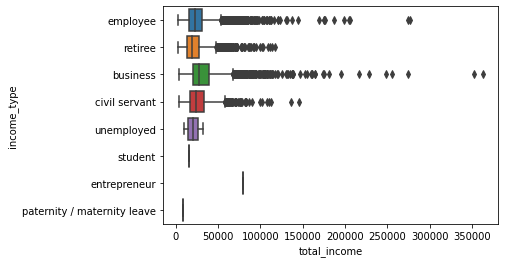

In [69]:
import seaborn as sns

sns.boxplot(data=df_wo_na, x='total_income', y='income_type')

[Buatlah keputusan tentang karakteristik yang paling menentukan pendapatan dan apakah Anda akan menggunakan median atau rata-rata. Jelaskan mengapa Anda membuat keputusan ini]


In [70]:
import math as math
        
def fill_na_total_income (row):
        if math.isnan(row['total_income']) == False:
            #print('test') #test
            return row['total_income']
        elif row['income_type'] == 'business':
            return income_type_median['business']
        elif row['income_type'] == 'civil servant':
            return income_type_median['civil servant']
        elif row['income_type'] == 'employee':
            return income_type_median['employee']
        elif row['income_type'] == 'paternity / maternity leave':
             return income_type_median['paternity / maternity leave']
        elif row['income_type'] == 'retiree':
            return income_type_median['retiree']
        elif row['income_type'] == 'student':
            return income_type_median['student']
        elif row['income_type'] == 'unemployed':    
            return income_type_median['unemployed']       

In [71]:
df.loc[(df['total_income'].isna() == True) & (df['income_type'] == 'unemployed')]

business_row = df.iloc[65].copy()
business_row['total_income'] = fill_na_total_income(business_row)
print('business_row:')
print(business_row)
print()

civil_servant_row = df.iloc[26].copy()
civil_servant_row['total_income'] = fill_na_total_income(civil_servant_row)
print('civil_servant_row:')
print(civil_servant_row)
print()

employee_row = df.iloc[82].copy()
employee_row['total_income'] = fill_na_total_income(employee_row)
print('employee_row:')
print(employee_row)
print()

#'paternity/maternity leave' tidak ada

retiree_row = df.iloc[12].copy()
retiree_row['total_income'] = fill_na_total_income(retiree_row)
print('retiree_row:')
print(retiree_row)
print()

#'student' tidak ada
#'unemployed' tidak ada

wo_na_row = df_wo_na.iloc[0].copy()
print('wo_na_row before:')
print(wo_na_row)
print()
wo_na_row['total_income'] = fill_na_total_income(wo_na_row)
print('wo_na_row after:')
print(wo_na_row)

business_row:
children                                                   0
days_employed                                            NaN
dob_years                                                 21
education                                secondary education
education_id                                               1
family_status                                      unmarried
family_status_id                                           4
gender                                                     M
income_type                                         business
debt                                                       0
total_income                                      27563.0285
purpose             transactions with commercial real estate
years_employed                                           NaN
dob_group                                              16-25
Name: 65, dtype: object

civil_servant_row:
children                              0
days_employed                       NaN
dob_year

In [72]:
df_w_t_income = df.copy()
#df_w_t_income
df_w_t_income['total_income'] = df_w_t_income.apply(fill_na_total_income, axis=1)

In [73]:
df_w_t_income.loc[df_w_t_income['total_income'].isna() == True ]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_group
5936,0,NaN,58,bachelor's degree,0,married,0,M,entrepreneur,0,NaN,buy residential real estate,NaN,56-65


[Jika Anda menemukan kesalahan dalam menyiapkan nilai untuk data yang hilang, mungkin berarti ada sesuatu yang istimewa tentang data untuk kategori tersebut. Mari pikirkan - Anda mungkin ingin memperbaiki beberapa hal secara manual, jika terdapat cukup data untuk menemukan median/rata-rata.]


In [74]:
df_w_t_income

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630,26-35
4,0,10900.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,29.863014,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219,36-45
21521,0,10900.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,29.863014,66-75
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041,36-45
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027,36-45


[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [75]:
df_w_t_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21423 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21423 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21423 non-null  int64  
 3   education         21423 non-null  object 
 4   education_id      21423 non-null  int64  
 5   family_status     21423 non-null  object 
 6   family_status_id  21423 non-null  int64  
 7   gender            21423 non-null  object 
 8   income_type       21423 non-null  object 
 9   debt              21423 non-null  int64  
 10  total_income      21422 non-null  float64
 11  purpose           21423 non-null  object 
 12  years_employed    19259 non-null  float64
 13  dob_group         21423 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.5+ MB


In [76]:
median = df_w_t_income["total_income"].median()
df_w_t_income["total_income"] = df["total_income"].replace(np.nan, median)
df_w_t_income

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630,26-35
4,0,10900.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,29.863014,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219,36-45
21521,0,10900.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,29.863014,66-75
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041,36-45
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027,36-45


In [77]:
df_w_t_income.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21423 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21423 non-null  int64  
 1   days_employed     19259 non-null  float64
 2   dob_years         21423 non-null  int64  
 3   education         21423 non-null  object 
 4   education_id      21423 non-null  int64  
 5   family_status     21423 non-null  object 
 6   family_status_id  21423 non-null  int64  
 7   gender            21423 non-null  object 
 8   income_type       21423 non-null  object 
 9   debt              21423 non-null  int64  
 10  total_income      21423 non-null  float64
 11  purpose           21423 non-null  object 
 12  years_employed    19259 non-null  float64
 13  dob_group         21423 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 2.5+ MB


###  Memperbaiki nilai di `days_employed`

[Pikirkan tentang parameter yang dapat membantu Anda memperbaiki nilai yang hilang di kolom ini. Pada akhirnya, Anda akan mengetahui apakah Anda harus menggunakan nilai rata-rata atau median untuk mengganti nilai yang hilang. Anda mungkin perlu melakukan penelitian yang sama dengan yang Anda lakukan saat memperbaiki data di kolom sebelumnya.]

In [78]:
dob_group_median = df_w_t_income.groupby('dob_group')['days_employed'].median()
dob_group_median

dob_group
16-25      796.5
26-35     1350.5
36-45     1916.5
46-55     2886.0
56-65    10900.0
66-75    10900.0
Name: days_employed, dtype: float64

In [79]:
dob_group_mean = df_w_t_income.groupby('dob_group')['days_employed'].mean()
dob_group_mean

dob_group
16-25      931.592626
26-35     1711.213311
36-45     2598.202245
46-55     4374.980805
56-65     8188.749004
66-75    10051.908385
Name: days_employed, dtype: float64

[Tentukan apa yang akan Anda gunakan: rata-rata atau median. Jelaskan mengapa.]

__Menggunakan median karena berdasarkan boxplot banyak ditemukan nilai outliers__

<AxesSubplot:xlabel='days_employed', ylabel='dob_group'>

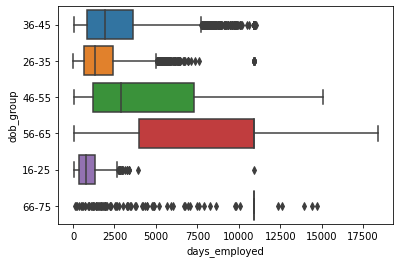

In [80]:
sns.boxplot(data=df_w_t_income, x='days_employed', y='dob_group')

In [81]:
def fill_days_employed_na (row) :
    if math.isnan(row['days_employed']) == False:
        return row['days_employed']
    elif row['dob_group'] == '16-25':
        return dob_group_median['16-25']
    elif row['dob_group'] == '26-35':
        return dob_group_median['26-35']
    elif row['dob_group'] == '36-45':
        return dob_group_median['36-45']
    elif row['dob_group'] == '46-55':
        return dob_group_median['46-55']
    elif row['dob_group'] == '56-65':
        return dob_group_median['56-65']
    elif row['dob_group'] == '66-75':
        return dob_group_median['66-75']

In [82]:
row_16_25 = df_w_t_income.loc[65].copy()
row_26_35 = df_w_t_income.loc[72].copy()
row_36_45 = df_w_t_income.loc[26].copy()
row_46_55 = df_w_t_income.loc[41].copy()
row_56_65 = df_w_t_income.loc[12].copy()
row_66_75 = df_w_t_income.loc[280].copy()
no_na = df_w_t_income.loc[25].copy()

row_16_25['days_employed'] = fill_days_employed_na(row_16_25)
row_26_35['days_employed'] = fill_days_employed_na(row_26_35)
row_36_45['days_employed'] = fill_days_employed_na(row_36_45)
row_46_55['days_employed'] = fill_days_employed_na(row_46_55)
row_56_65['days_employed'] = fill_days_employed_na(row_56_65)
row_66_75['days_employed'] = fill_days_employed_na(row_66_75)

lists = [row_16_25, row_26_35, row_36_45, row_46_55, row_56_65, row_66_75]

for row in lists:
    print(row['dob_group']+':')
    print(row)
    print()
    
print('no_na before:')
print(no_na)
print()
no_na['days_employed'] = fill_days_employed_na(no_na)
print('no_na after:')
print(no_na)

16-25:
children                                                   0
days_employed                                          796.5
dob_years                                                 21
education                                secondary education
education_id                                               1
family_status                                      unmarried
family_status_id                                           4
gender                                                     M
income_type                                         business
debt                                                       0
total_income                                      22815.1035
purpose             transactions with commercial real estate
years_employed                                           NaN
dob_group                                              16-25
Name: 65, dtype: object

26-35:
children                                                   1
days_employed                                 

In [85]:
df_d_employed_filled = df_w_t_income.copy()
df_d_employed_filled['days_employed'] = df_d_employed_filled.apply(fill_days_employed_na, axis=1)
df_d_employed_filled

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,dob_group
0,1,8437.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.115068,36-45
1,1,4024.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.024658,36-45
2,0,5623.0,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,15.405479,26-35
3,3,4124.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.298630,26-35
4,0,10900.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,29.863014,46-55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.408219,36-45
21521,0,10900.0,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,29.863014,66-75
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.789041,36-45
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.526027,36-45


[Setelah Anda selesai dengan `total_income`, periksa apakah jumlah total nilai di kolom ini sesuai dengan jumlah nilai di kolom lain.]

In [86]:
df_d_employed_filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21423 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21423 non-null  int64  
 1   days_employed     21423 non-null  float64
 2   dob_years         21423 non-null  int64  
 3   education         21423 non-null  object 
 4   education_id      21423 non-null  int64  
 5   family_status     21423 non-null  object 
 6   family_status_id  21423 non-null  int64  
 7   gender            21423 non-null  object 
 8   income_type       21423 non-null  object 
 9   debt              21423 non-null  int64  
 10  total_income      21423 non-null  float64
 11  purpose           21423 non-null  object 
 12  years_employed    19259 non-null  float64
 13  dob_group         21423 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 3.0+ MB


## Pengkategorian Data

[Untuk menjawab pertanyaan dan menguji hipotesis, Anda akan bekerja dengan data yang telah dikategorikan. Lihatlah pertanyaan-pertanyaan yang diajukan kepada Anda dan yang harus Anda jawab. Pikirkan tentang data mana yang perlu dikategorikan untuk menjawab pertanyaan-pertanyaan ini. Di bawah ini, Anda akan menemukan templat yang bisa Anda gunakan untuk mengkategorikan data. Proses pertama mencakup data teks; yang kedua membahas data numerik yang perlu dikategorikan. Anda dapat menggunakan kedua petunjuk yang disarankan atau tidak sama sekali - semuanya terserah Anda.]

[Terlepas dari keputusan Anda untuk mengatasi pengkategorian, pastikan bahwa Anda secara lugas memberikan penjelasan tentang mengapa Anda membuat keputusan tersebut. Ingat: ini adalah pekerjaan Anda dan Andalah yang berhak membuat segala keputusan.]


In [87]:
print("saya akan mengkategorikan data pada kolom 'purpose' dan 'total_income' \nBerikut datanya: \n\ntotal_income")
print(df_d_employed_filled['total_income'])
print()
print('purpose')
print(df_d_employed_filled['purpose'])

saya akan mengkategorikan data pada kolom 'purpose' dan 'total_income' 
Berikut datanya: 

total_income
0        40620.102
1        17932.802
2        23341.752
3        42820.568
4        25378.572
           ...    
21520    35966.698
21521    24959.969
21522    14347.610
21523    39054.888
21524    13127.587
Name: total_income, Length: 21423, dtype: float64

purpose
0          purchase of the house
1                   car purchase
2          purchase of the house
3        supplementary education
4              to have a wedding
                  ...           
21520       housing transactions
21521          purchase of a car
21522                   property
21523          buying my own car
21524               to buy a car
Name: purpose, Length: 21423, dtype: object


[Mari kita memeriksa nilai unik]

In [88]:
def find_word_in_array (looked_array, list_to_fill, word_to_find):
    for match in looked_array:
        if word_to_find in match:
            list_to_fill.append(match)
porpose_property = []
porpose_education = []
purpose_car = []
purpose_wedding = []
df_purpose_unique = df_d_employed_filled['purpose'].sort_values().unique()

find_word_in_array(df_purpose_unique, porpose_property, 'property')
find_word_in_array(df_purpose_unique, porpose_property, 'house')
find_word_in_array(df_purpose_unique, porpose_property, 'real estate')
find_word_in_array(df_purpose_unique, porpose_property, 'housing')

find_word_in_array(df_purpose_unique, porpose_education, 'education')
find_word_in_array(df_purpose_unique, porpose_education, 'university')
find_word_in_array(df_purpose_unique, porpose_education, 'educated')

find_word_in_array(df_purpose_unique, purpose_car, 'car')

find_word_in_array(df_purpose_unique, purpose_wedding, 'wedding')

print('nilai unique dari purpose:')
df_purpose_unique

nilai unique dari purpose:


array(['building a property', 'building a real estate',
       'buy commercial real estate', 'buy real estate',
       'buy residential real estate', 'buying a second-hand car',
       'buying my own car', 'buying property for renting out', 'car',
       'car purchase', 'cars', 'construction of own property',
       'education', 'getting an education', 'getting higher education',
       'going to university', 'having a wedding', 'housing',
       'housing renovation', 'housing transactions', 'profile education',
       'property', 'purchase of a car', 'purchase of my own house',
       'purchase of the house', 'purchase of the house for my family',
       'real estate transactions', 'second-hand car purchase',
       'supplementary education', 'to become educated', 'to buy a car',
       'to get a supplementary education', 'to have a wedding',
       'to own a car', 'transactions with commercial real estate',
       'transactions with my real estate', 'university education',
       'we

[Kelompok utama apakah yang dapat Anda identifikasi berdasarkan nilai uniknya?]

__Dari sekian banyak nilai unik, yang saya lihat hanya ada 4 tujuan utama :__

__Pembelian property__

__Membeli kendaraan__

__Membiayai pendidikan__

__Membiayai pernikahan__

[Kita akan mengkategorikan data kita berdasarkan topik ini.]


In [89]:
def find_word_in_df (row) :
    for match in porpose_property:
        if row['purpose'] in match:
            return 'to buy property'
        else: 
            pass
    for match in porpose_education:
        if row['purpose'] in match:
            return 'to get education'
        else: 
            pass
    for match in purpose_car:
        if row['purpose'] in match:
            return 'to buy a car'
        else: 
            pass
    for match in purpose_wedding:
        if row['purpose'] in match:
            return 'to get married'
        else: 
            pass
        
#df_d_employed_filled

print(find_word_in_df(df_d_employed_filled.iloc[0])) #test to buy property
print(find_word_in_df(df_d_employed_filled.iloc[1])) #test to buy a car
print(find_word_in_df(df_d_employed_filled.iloc[3])) #test to get education
print(find_word_in_df(df_d_employed_filled.iloc[4])) #test to get married

to buy property
to buy a car
to get education
to get married


In [90]:
df_new_group = df_d_employed_filled.copy()
df_new_group['purpose_group'] = df_new_group.apply(find_word_in_df, axis = 1)

df_new_group['purpose_group'].value_counts()

to buy property     10792
to buy a car         4293
to get education     4004
to get married       2334
Name: purpose_group, dtype: int64

[Jika Anda memutuskan untuk mengategorikan data numerik, Anda juga harus membuat kategori untuk data tersebut.]

In [91]:
total_income_median = df_new_group['total_income'].median()
total_income_median

22815.103499999997

<AxesSubplot:xlabel='total_income'>

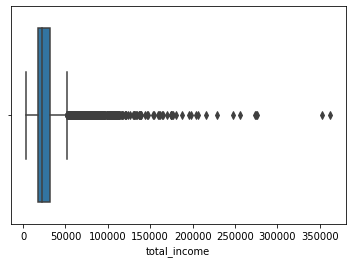

In [92]:
sns.boxplot(data=df_new_group, x='total_income')

[Tentukan rentang apa yang akan Anda gunakan untuk pengelompokan dan jelaskan alasannya.]

In [93]:
df_new_group.loc[df_new_group['total_income'] > 50000, 'total_income'].shape

(1318,)

__Untuk kolom purpose saya mendapatkan temuan tujuan pinjaman dari nasabah adalah untuk membiayai properti.__

__Untuk kolom total income saya mendapatkan 3 temuan:__

__Nilai median dari total_income adalah sebesar 22,815.10.__

__Berdasarkan visualisasi dari boxplot menunjukan nilai outliers setelah datas 50,000.__

__Jumlah nasabah yang memiliki total_income diatas 50,000 sebanyak 1,318 nasabah.__

[Tentukan rentang apa yang akan Anda gunakan untuk pengelompokan dan jelaskan alasannya.]

__Untuk yang kolom numerik, yaitu total_income. Berdasarkan temuan sebelumnya saya akan membagi menjadi 3 rentang / kelompok:__

__Rendah, dibawah median 22,815__

__Sedang, diatas median dan dibawah batas outlier dari boxplot, 50.000__

__Diatas 50.000__

__Karena jumlah nasabah yang diatas batas outliers cukup banyak maka saya menjadikan yang diatas batas outliers sebagai rentang atas, dan membagi nasabah diluar outliers menjadi sedang dan rendah dengan nilai median.__

In [95]:
def grouping_total_income(row) :
    if row['total_income'] <= total_income_median:
        return 'low'
    elif row['total_income'] > total_income_median and row['total_income'] <= 50000:
        return 'medium'
    elif row['total_income'] > 50000:
        return 'high'

print(grouping_total_income(df_new_group.iloc[1])) #test low
print(grouping_total_income(df_new_group.iloc[0])) #test medium  
print(grouping_total_income(df_new_group.iloc[39])) #test high
    
#df_new_group.loc[df_new_group['total_income'] > 50000]

low
medium
high


In [96]:
df_new_group['total_income_group'] = df_new_group.apply(grouping_total_income, axis=1)

In [97]:
df_new_group['total_income_group'].value_counts()

low       11506
medium     8599
high       1318
Name: total_income_group, dtype: int64

## Memeriksa hipotesis


**Apakah terdapat korelasi antara memiliki anak dengan melakukan pelunasan tepat waktu?**

In [98]:
df_new_group.loc[:,['children', 'debt']]

,children,debt
0,1,0
1,1,0
2,0,0
3,3,0
4,0,0
...,...,...
21520,1,0
21521,0,0
21522,1,1
21523,3,1


In [99]:
table_children_debt_1 = pd.pivot_table(df_new_group, values='total_income', index = ['children'], columns = ['debt'], aggfunc = 'count')
table_children_debt_1

debt,0,1
children,,
0,13021.0,1058.0
1,4407.0,442.0
2,1915.0,202.0
3,301.0,27.0
4,37.0,4.0
5,9.0,NaN


In [100]:
table_children_debt_2 = pd.crosstab(df_new_group['children'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_children_debt_2

debt,0,1
children,,
0,0.924853,0.075147
1,0.908847,0.091153
2,0.904582,0.095418
3,0.917683,0.082317
4,0.902439,0.097561
5,1.000000,0.000000


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan yang Anda lakukan.]

__Tidak ada hubungannya antara jumlah anak dengan kegagalan bayar. Karena jika dilihat dari jumlah, semakin sedikit anak justru semakin banyak jumlah yang mengalami gagal bayar. Meskipun jika dilihat dari distribusi per jumlah children, persentase gagal bayar pada nasabah yang tidak memiliki anak lebih rendah dibandingkan yang memiliki anak.__|


**Apakah terdapat korelasi antara status keluarga dengan pelunasan tepat waktu?**

In [101]:
df_new_group.loc[:,['family_status', 'debt']]

,family_status,debt
0,married,0
1,married,0
2,married,0
3,married,0
4,civil partnership,0
...,...,...
21520,civil partnership,0
21521,married,0
21522,civil partnership,1
21523,married,1


In [102]:
table_fam_status_debt_1 = pd.pivot_table(df_new_group, values='total_income', index = ['family_status'], columns = ['debt'], aggfunc = 'count')
table_fam_status_debt_1

debt,0,1
family_status,,
civil partnership,3769,386
divorced,1100,85
married,11404,927
unmarried,2524,273
widow / widower,893,62


In [103]:
table_fam_status_debt_2 = pd.crosstab(df_new_group['family_status'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_fam_status_debt_2

debt,0,1
family_status,,
civil partnership,0.907100,0.092900
divorced,0.928270,0.071730
married,0.924824,0.075176
unmarried,0.902395,0.097605
widow / widower,0.935079,0.064921


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan Anda.]

__Berdasarkan ketiga tabel diatas, saya melihat persentase kegagalan bayar cenderung lebih tinggi pada civil partnership dan unmarried.__

**Apakah terdapat korelasi antara tingkat pendapatan dengan membayar kembali tepat waktu?**

In [104]:
df_new_group.loc[:,['total_income_group', 'debt']]

,total_income_group,debt
0,medium,0
1,low,0
2,medium,0
3,medium,0
4,medium,0
...,...,...
21520,medium,0
21521,medium,0
21522,low,1
21523,medium,1


In [105]:
table_tot_inc_grp_debt_1 = pd.pivot_table(df_new_group, values='total_income', index = ['total_income_group'], columns = ['debt'], aggfunc = 'count')
table_tot_inc_grp_debt_1

debt,0,1
total_income_group,,
high,1226,92
low,10563,943
medium,7901,698


In [106]:
table_tot_inc_grp_debt_2 = pd.crosstab(df_new_group['total_income_group'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_tot_inc_grp_debt_2

debt,0,1
total_income_group,,
high,0.930197,0.069803
low,0.918043,0.081957
medium,0.918828,0.081172


**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan Anda.]

__Saya tadinya menduga pendapatan berpengaruh terhadap gagal bayar. Namun ketika membandingkan distribusi frekuensi antara nasabah yang gagal bayar dan berhasil bayar. Kurang lebih komposisinya serupa.__

__Namun setelah dilihat secara persentase. Meskipun secara jumlah rendah, namun tingkat kegagal bayar pada nasabah dengan tingkat pendapatan tinggi relatif lebih rendah dan sebaliknya.__

**Bagaimana tujuan kredit memengaruhi tingkat gagal bayar?**

In [107]:
table_purpose_grp_debt_col = pd.crosstab(df_new_group['purpose_group'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'columns')
table_purpose_grp_debt_col

debt,0,1
purpose_group,,
to buy a car,0.197715,0.230814
to buy property,0.508532,0.449510
to get education,0.184561,0.213503
to get married,0.109192,0.106174


In [108]:
table_purpose_grp_debt_idx = pd.crosstab(df_new_group['purpose_group'], df_new_group['debt'], values = 'total_income', aggfunc = 'count', normalize = 'index')
table_purpose_grp_debt_idx

debt,0,1
purpose_group,,
to buy a car,0.906825,0.093175
to buy property,0.927817,0.072183
to get education,0.907592,0.092408
to get married,0.921165,0.078835


tabel persentase per index

**Kesimpulan**

[Tulis kesimpulan Anda berdasarkan manipulasi dan pengamatan yang Anda lakukan.]

__Persentase dengan tujuan kredit untuk pembelian mobil dan edukasi lebih tinggi pada kelompok yang pernah gagal bayar dibandingkan dengan pada kelompok yg tidak pernah gagal bayar, jika kita membandingkan setiap tujuan kredit. Namun jika melihat dari seluruh nasabah yang mengalami kegagalan bayar, nasabah yang dengan tujuan pembiayaan properti paling tinggi dibandingkan tujuan lainnya. Untuk membiayai properti merupakan tujuan terbanyak dari seluruh nasabah baik yang pernah ataupun tidak pernah mengalami gagal bayar.__

# Kesimpulan umum 

[Tuliskan kesimpulan Anda di bagian akhir ini. Pastikan Anda memasukkan semua kesimpulan penting yang telah Anda buat berkaitan dengan cara Anda memproses dan menganalisis data. Kesimpulan tersebut harus membahas nilai yang hilang, duplikat, dan kemungkinan alasan serta solusi untuk data bermasalah yang harus Anda tangani.]

__Kesimpulan saya dalam tugas akhir di sprint ini adalah kita tidak bisa terburu-buru mengambil kesimpulan dan perlunya membandingkan data.__

__Hal tersebut saya alami ketika melakukan analisa pada data 'total_income' dan 'days_employed' yang hilang. Pada saat itu karena pada distribusi data yang hilang didominasi oleh nasabah dengan tingkat pendidikan secondary education. Namun saat melihat pada distribusi yang datanya lengkap polanya pun sama. Artinya pola tersebut memang terjadi pada seluruh dataset.__

__Begitu jg ketika mencari faktor yang mempengaruhi gagal bayar. Saya menduga tingkat pendapatan yang rendah berpengaruh terhadap gagal bayar. Namun ketika dibandingkan dengan data kelompok yang tidak pernah gagal bayar. Komposisinya tingkat pendapatan rendah, sedang, dan tinggi kurang lebih memiliki persentase yang serupa.__

__Kemudian saya mencoba melihat persentase per index. Ada beberapa temuan baru:__

__Nasabah yang tidak memiliki anak cenderung lebih sedikit mengalami kegagalan bayar.__

__Nasabah dengan family_status unmarried dan civil partnership memiliki persentase lebih tinggi gagal bayar.__

__Nasabah dengan purpose pembiayaan mobil dan pendidikan juga memiliki persentase lebih tinggi gagal bayar.__

[Tuliskan juga kesimpulan Anda mengenai pertanyaan-pertanyaan yang diajukan di sini.]

__Saya kewalahan dan bingung dengan instruksinya, karena sangat berbeda dengan latihan yang ada, saya harus mulai berpikir keras untuk mengartikan maksud yang diminta dalam proses pengerjaan.__